In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
real_df = pd.read_csv("Data/Real_Datasets/wine_processed.csv")
ttvae_df = pd.read_csv('Data/Synthetic_Datasets/TTVAE/synthetic4.csv')

In [12]:
print('TTVAE Synthetic Dataset')
display(ttvae_df.head())

TTVAE Synthetic Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,-0.410258,3.036222,-1.116093,-0.592214,0.195907,-0.078243,-1.017752,0.291659,2.312679,0.015952,0.639734,0.208005,red
1,0.941180,0.194904,0.996435,-0.089607,-0.775195,0.067904,-0.027725,-1.045173,-1.846948,-0.866440,2.730335,0.208006,white
2,0.343236,1.080555,0.883006,0.652785,-0.912822,0.229726,-0.054804,0.767115,0.040008,1.877228,1.268545,0.207484,white
3,0.362384,-0.189241,0.772255,-0.852867,0.581064,-1.605818,-0.784400,0.103488,0.907045,0.891350,1.072181,0.207961,red
4,-1.461936,-0.195985,-0.109234,-0.989059,-0.813164,0.016815,-0.038076,-2.110584,0.532715,-0.868689,2.554449,1.353361,white


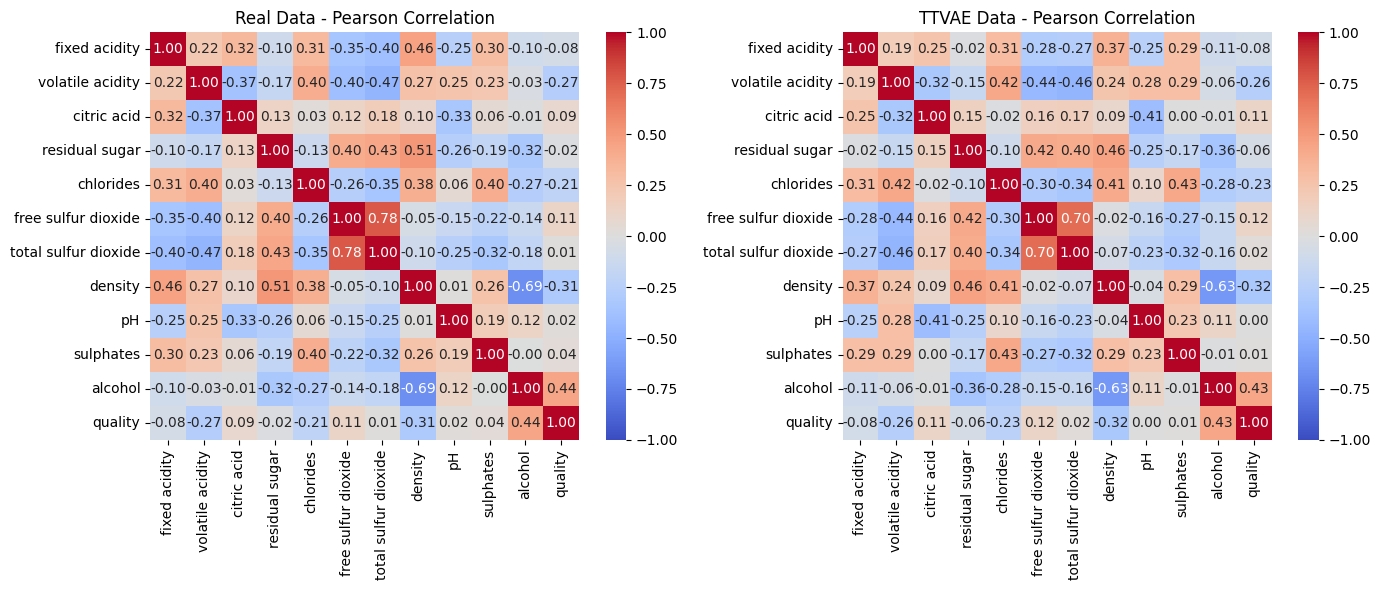

In [13]:
real_num = real_df.select_dtypes(include='number')
ttvae_num = ttvae_df.select_dtypes(include='number')

real_pearson = real_num.corr(method='pearson')
ttvae_pearson = ttvae_num.corr(method='pearson')

plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.heatmap(real_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Real Data - Pearson Correlation')

# Synthesized data
plt.subplot(1, 2, 2)
sns.heatmap(ttvae_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('TTVAE Data - Pearson Correlation')

plt.tight_layout()
plt.show()

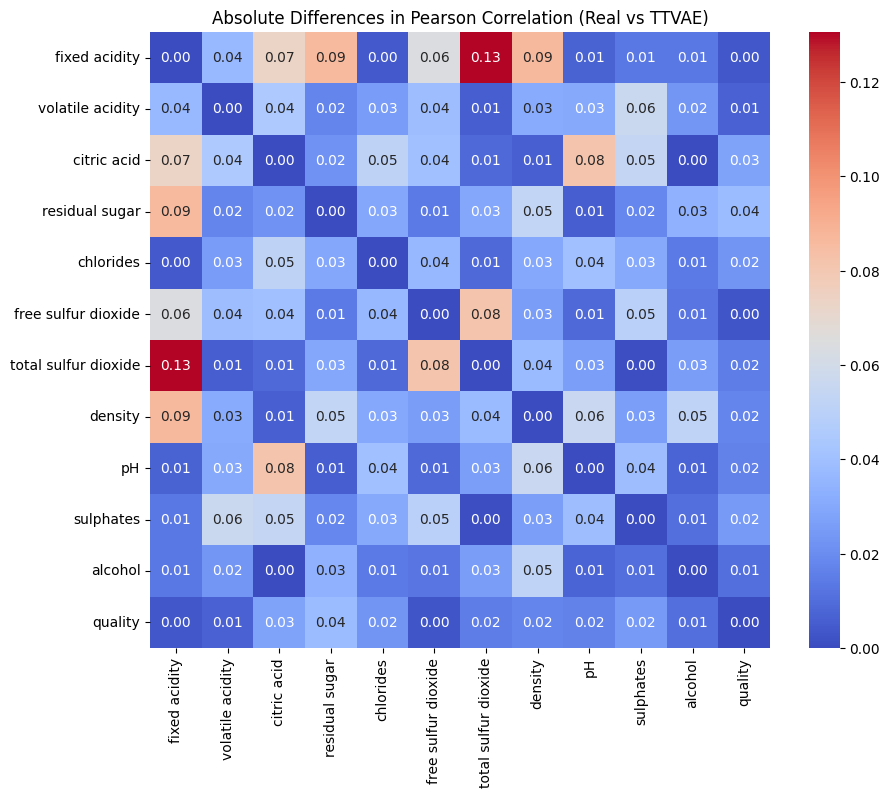

In [15]:
diff_ttvae = (real_pearson - ttvae_pearson).abs()
plt.figure(figsize=(10, 8))
sns.heatmap(diff_ttvae, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Absolute Differences in Pearson Correlation (Real vs TTVAE)")
plt.show()

In [16]:
# Compute absolute differences (you already have diff_df)
abs_diff = diff_ttvae.abs()

# Mean absolute difference (off-diagonal)
vals = abs_diff.values[np.triu_indices_from(abs_diff, k=1)]
print("Mean absolute Pearson diff:", round(vals.mean(), 3))

# Find top 3 biggest drifts
pairs = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    pairs.append((abs_diff.iloc[i, j], diff_ttvae.columns[i], diff_ttvae.columns[j]))
top3 = sorted(pairs, reverse=True)[:3]
print("Top 3 biggest correlation shifts:")
for diff, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {diff:.2f}")


Mean absolute Pearson diff: 0.031
Top 3 biggest correlation shifts:
  'fixed acidity' vs 'total sulfur dioxide': Δ = 0.13
  'fixed acidity' vs 'density': Δ = 0.09
  'fixed acidity' vs 'residual sugar': Δ = 0.09


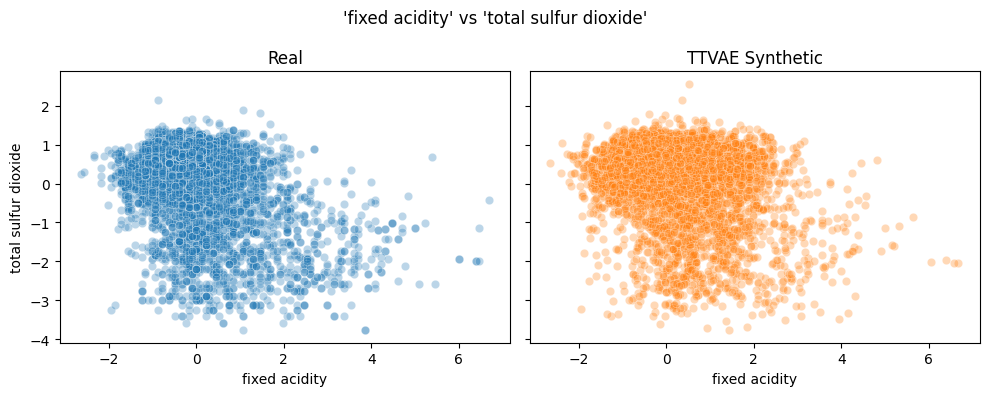

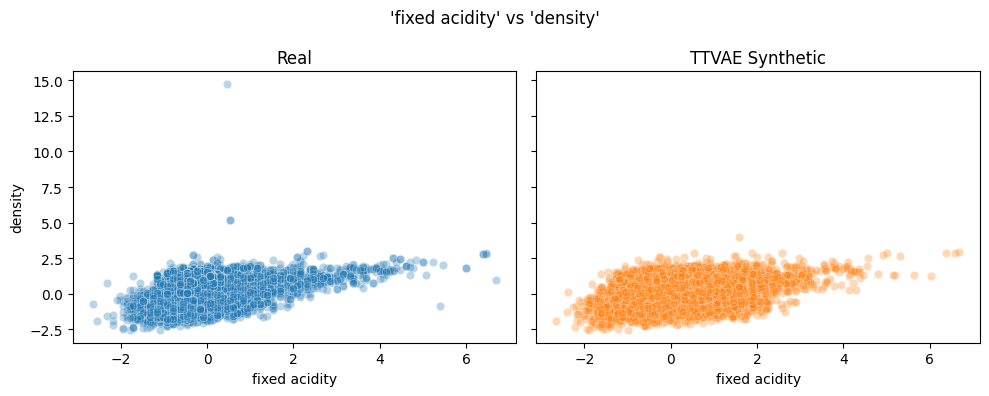

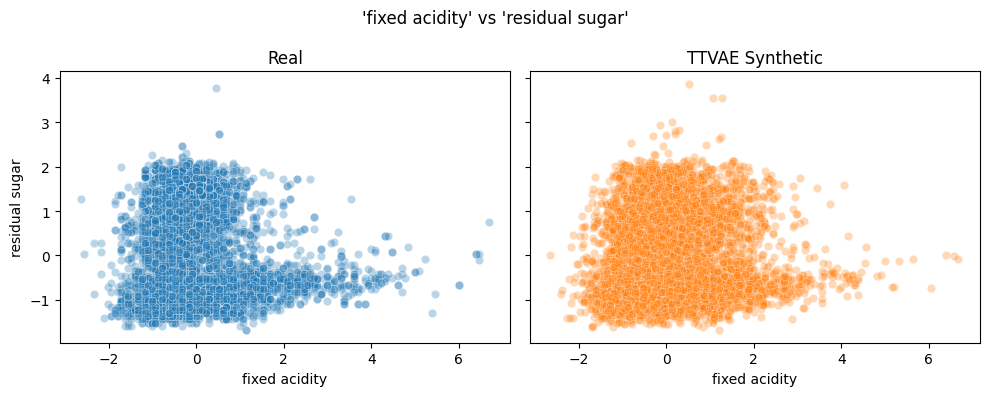

In [17]:
for x,y in [("fixed acidity","total sulfur dioxide"),
            ("fixed acidity","density"),
            ("fixed acidity","residual sugar")]:
    fig, axes = plt.subplots(1,2,figsize=(10,4), sharex=True, sharey=True)
    sns.scatterplot(data=real_df, x=x, y=y, ax=axes[0], alpha=0.3)
    axes[0].set_title("Real")
    sns.scatterplot(data=ttvae_df, x=x, y=y, ax=axes[1], alpha=0.3, color="C1")
    axes[1].set_title("TTVAE Synthetic")
    plt.suptitle(f"{x!r} vs {y!r}")
    plt.tight_layout()
    plt.show()

In [41]:
low_real = (real_df['total sulfur dioxide'] < -2).sum()
low_syn  = (ttvae_df['total sulfur dioxide'] < -2).sum()
print(f"Points < -2σ: real={low_real}, synthetic={low_syn}")


Points < -2σ: real=453, synthetic=346


In [ ]:
Spearman Correlation

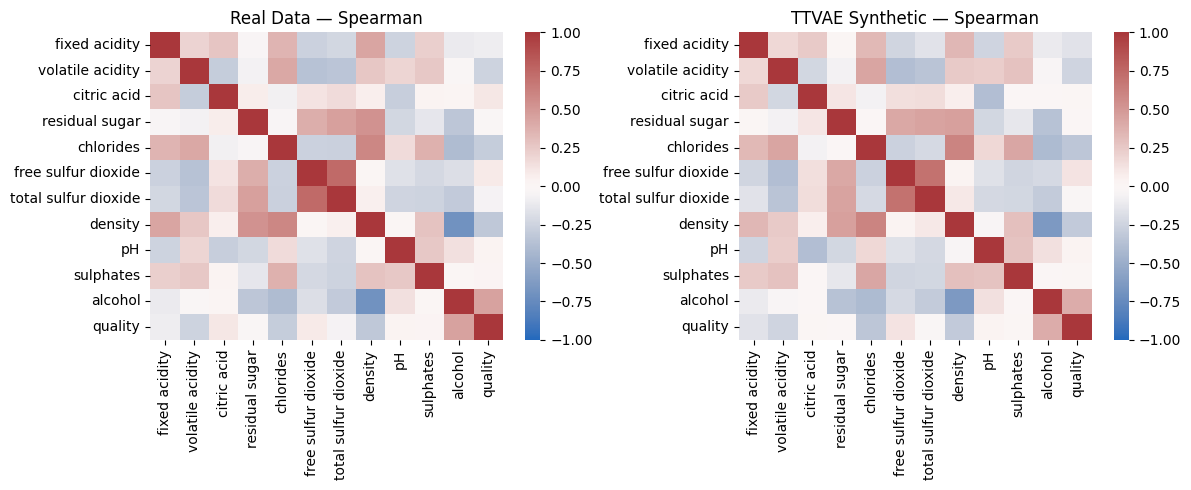

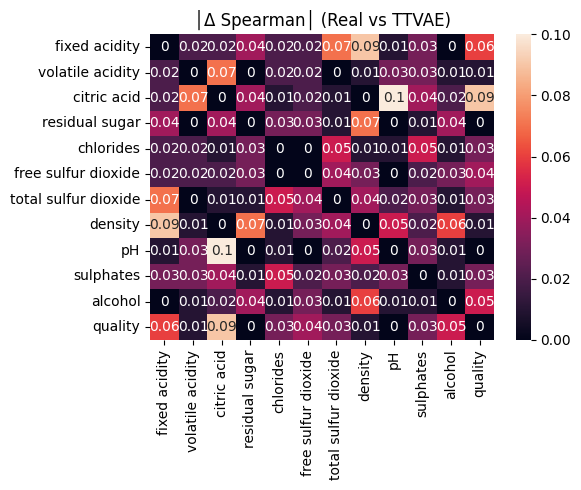

In [26]:

real_spear = real_num.corr(method="spearman")
ttvae_spear  = ttvae_num.corr(method="spearman")

# 4) Plot side by side
fig, axes = plt.subplots(1,2,figsize=(12,5), tight_layout=True)
sns.heatmap(real_spear, vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[0])
axes[0].set_title("Real Data — Spearman")
sns.heatmap(ttvae_spear,  vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[1])
axes[1].set_title("TTVAE Synthetic — Spearman")
plt.show()

# 5) Compute & plot absolute‐difference
diff_spear = (ttvae_spear - real_spear).abs().round(2)
plt.figure(figsize=(6,5))
sns.heatmap(diff, vmin=0, vmax=diff.values.max(), cmap="rocket", annot=True)
plt.title("│Δ Spearman│ (Real vs TTVAE)")
plt.tight_layout()
plt.show()


In [27]:
i,j = np.triu_indices_from(diff_spear, k=1)
print("Mean │Δ Spearman│:", diff.values[i,j].mean().round(3))


Mean │Δ Spearman│: 0.028


In [28]:
i, j = np.triu_indices_from(diff_spear, k=1)
pairs = [(diff_spear.values[i_, j_], diff_spear.columns[i_], diff_spear.columns[j_])
         for i_, j_ in zip(i, j)]

# Sort and take top 3
top3 = sorted(pairs, reverse=True)[:3]

# Print nicely
print("Top 3 biggest Spearman shifts:")
for delta, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {delta:.2f}")


Top 3 biggest Spearman shifts:
  'citric acid' vs 'pH': Δ = 0.10
  'fixed acidity' vs 'density': Δ = 0.09
  'citric acid' vs 'quality': Δ = 0.09


Removing outliers threshold 3

In [36]:
No_outlier_df = pd.read_csv("Data/Synthetic_Datasets/TTVAE/synthetic_no_outliers.csv")
real_No_outlier = pd.read_csv("Data/Real_Datasets/wine_no_outliers.csv")

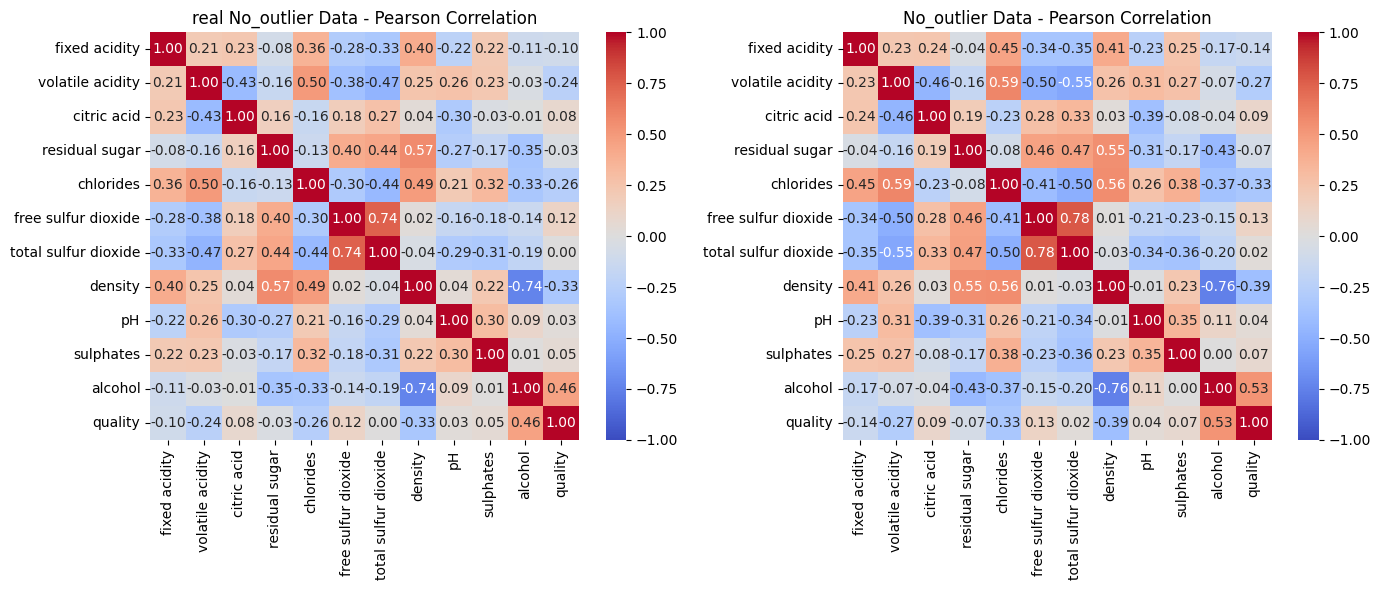

In [39]:
No_outlier_num = No_outlier_df.select_dtypes(include='number')
real_No_outlier_num = real_No_outlier.select_dtypes(include='number')

No_outlier_pearson = No_outlier_num.corr(method='pearson')
real_No_outlier_pearson = real_No_outlier_num.corr(method='pearson')

plt.figure(figsize=(14, 6))

# Synthesized data
plt.subplot(1, 2, 2)
sns.heatmap(No_outlier_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('No_outlier Data - Pearson Correlation')

plt.subplot(1, 2, 1)
sns.heatmap(real_No_outlier_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('real No_outlier Data - Pearson Correlation')

plt.tight_layout()
plt.show()

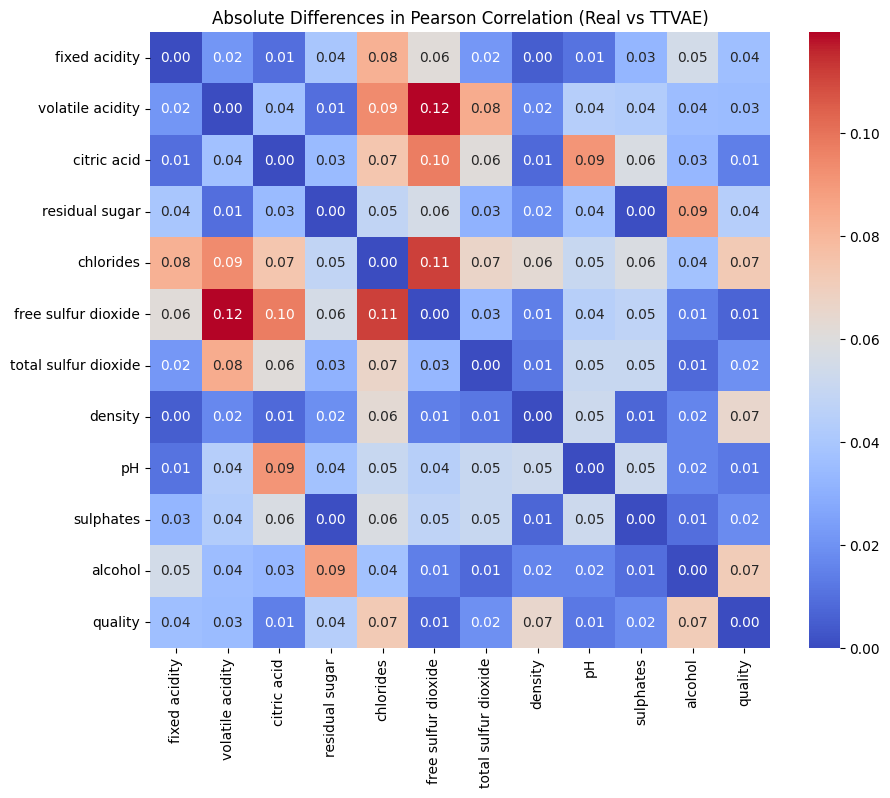

In [40]:
diff_no_outlier = (real_No_outlier_pearson - No_outlier_pearson).abs()
plt.figure(figsize=(10, 8))
sns.heatmap(diff_no_outlier, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Absolute Differences in Pearson Correlation (Real vs TTVAE)")
plt.show()

In [42]:
# Compute absolute differences (you already have diff_df)
abs_no_outlier_diff = diff_no_outlier.abs()

# Mean absolute difference (off-diagonal)
vals = abs_no_outlier_diff.values[np.triu_indices_from(abs_no_outlier_diff, k=1)]
print("Mean absolute Pearson diff:", round(vals.mean(), 3))

# Find top 3 biggest drifts
pairs = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    pairs.append((abs_no_outlier_diff.iloc[i, j], diff_no_outlier.columns[i], diff_no_outlier.columns[j]))
top3 = sorted(pairs, reverse=True)[:3]
print("Top 3 biggest correlation shifts:")
for diff, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {diff:.2f}")

Mean absolute Pearson diff: 0.042
Top 3 biggest correlation shifts:
  'volatile acidity' vs 'free sulfur dioxide': Δ = 0.12
  'chlorides' vs 'free sulfur dioxide': Δ = 0.11
  'citric acid' vs 'free sulfur dioxide': Δ = 0.10


Checking the effect of threshold for removing outliers

In [46]:
import pandas as pd
from scipy import stats
df = pd.read_csv("Data/Real_Datasets/wine_processed.csv")

# Compute z-scores for all numeric columns
numeric_cols = df.select_dtypes(include=["float64","int64"]).columns
zs = pd.DataFrame(stats.zscore(df[numeric_cols]), columns=numeric_cols)

# 1c) Peek at the z-score summary
print(zs.describe().T[["min","max"]])


                           min        max
fixed acidity        -2.634589   6.699425
volatile acidity     -1.817681   5.771086
citric acid          -2.192833   9.231281
residual sugar       -1.687053   3.783867
chlorides            -1.463780  13.734706
free sulfur dioxide  -3.927293   3.665722
total sulfur dioxide -3.765669   2.161136
density              -2.530192  14.768791
pH                   -3.100615   4.923029
sulphates            -2.091935   9.870879
alcohol              -2.089350   3.696231
quality              -3.227687   3.643685


In [48]:
# Defining thresholds to test
thresholds = [2.5, 3.0, 3.5, 4.0, 4.5, 5]

# For each threshold, compute how many rows remain
results = []
for t in thresholds:
    mask = (zs.abs() <= t).all(axis=1)
    kept = mask.sum()
    results.append((t, kept))

# Display the table
import pandas as pd
pd.DataFrame(results, columns=["σ-cutoff", "Rows kept"])

,σ-cutoff,Rows kept
0,2.5,5553
1,3.0,6007
2,3.5,6245
3,4.0,6344
4,4.5,6402
5,5.0,6432


In [50]:
# Apply a 5σ cutoff to remove only the most extreme outliers
cutoff = 5

# Reuse zs (z-scores) and df from before
mask_5 = (zs.abs() <= cutoff).all(axis=1)
df_5 = df[mask_5].reset_index(drop=True)

# Check how many rows remain
print(f"Rows after {cutoff}σ cutoff: {len(df_5)}")

df_5.to_csv("Data/Real_Datasets/wine_5sigma.csv", index=False)


Rows after 5σ cutoff: 6432


In [51]:
# Load the real (no‐outliers) data
real_5 = pd.read_csv("Data/Real_Datasets/wine_5sigma.csv")

# Load the TTVAE synthetic (5σ) data
syn_5  = pd.read_csv("Data/Synthetic_Datasets/TTVAE/synthetic_5sigma.csv")

In [53]:
real_5_num = real_5.select_dtypes(include='number')
syn_5_num = syn_5.select_dtypes(include='number')

# Compute Pearson correlations
real_corr_5 = real_5_num.corr(method="pearson")
syn_corr_5  = syn_5_num.corr(method="pearson")

# Absolute difference
diff_5 = (syn_corr_5 - real_corr_5).abs().round(2)

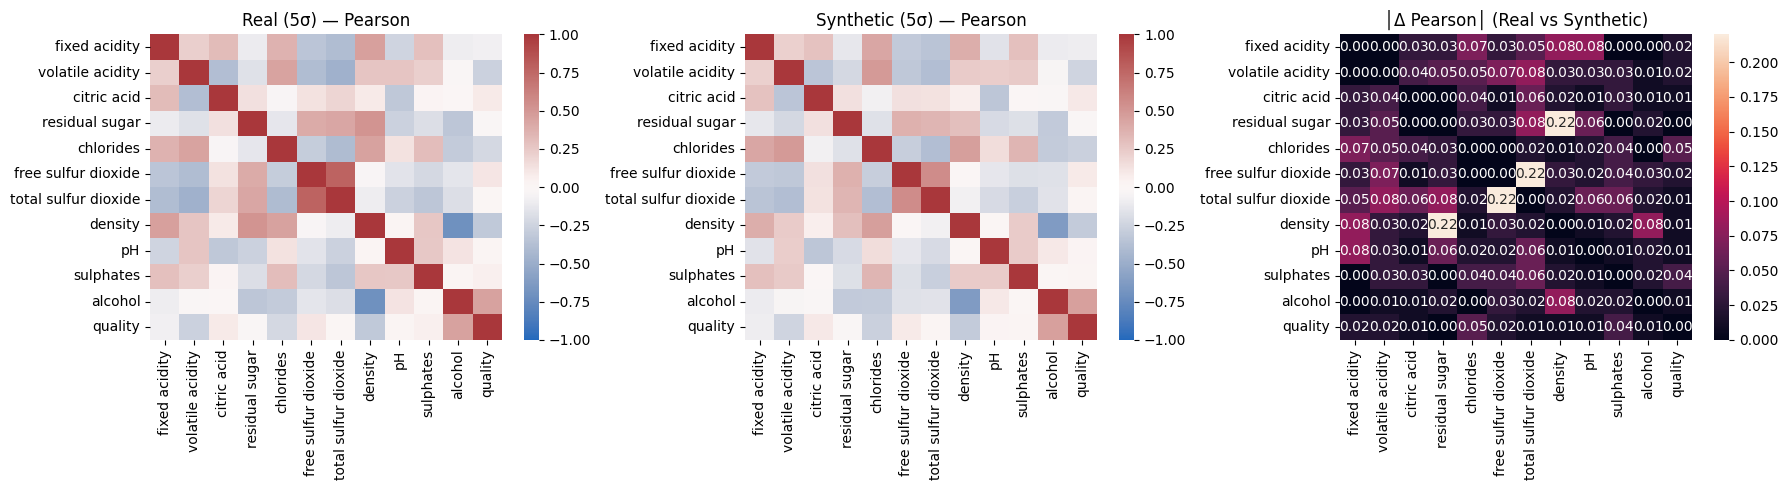

In [55]:
# Display side‐by‐side
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)

sns.heatmap(real_corr_5, vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[0])
axes[0].set_title("Real (5σ) — Pearson")

sns.heatmap(syn_corr_5,  vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[1])
axes[1].set_title("Synthetic (5σ) — Pearson")

sns.heatmap(diff_5, cmap="rocket", annot=True, fmt=".2f", ax=axes[2])
axes[2].set_title("│Δ Pearson│ (Real vs Synthetic)")

plt.show()


In [56]:
# Mean absolute Δ (off-diagonal)
i, j = np.triu_indices_from(diff_5, k=1)
mad5 = diff_5.values[i, j].mean()
print(f"Mean │Δ Pearson│ (5σ): {mad5:.3f}")

# Top 3 shifts
pairs5 = [(diff_5.values[i_, j_], diff_5.index[i_], diff_5.columns[j_])
          for i_, j_ in zip(*np.triu_indices_from(diff_5, k=1))]
top3_5 = sorted(pairs5, reverse=True)[:3]
print("Top 3 biggest Pearson shifts (5σ):")
for delta, f1, f2 in top3_5:
    print(f"  {f1!r} vs {f2!r}: Δ = {delta:.2f}")


Mean │Δ Pearson│ (5σ): 0.035
Top 3 biggest Pearson shifts (5σ):
  'residual sugar' vs 'density': Δ = 0.22
  'free sulfur dioxide' vs 'total sulfur dioxide': Δ = 0.22
  'volatile acidity' vs 'total sulfur dioxide': Δ = 0.08
